In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [2]:
data_folder = Path('C:\\Users\\marcb\\Desktop\\SpinGlassesModel\\data')
N = np.arange(100, 1100, 100)
B = 0.0
T = np.arange(0, 0.6, 0.1)
iterations = 100000
seeds = 100

In [3]:
m = np.zeros(shape=(2, N.size, T.size, seeds))
for i, n in enumerate(N):
    for j, t in enumerate(T):
        for seed in range(seeds):
            filename = data_folder / f"{n}_{B}_{t:.1f}_{iterations}" / f"{seed}.json"
            with open(filename, 'r') as f:
                dictionary = json.load(f)
            m[0, i, j, seed] = dictionary['m_init']
            m[1, i, j, seed] = dictionary['m_final']
m_mean = np.abs(m).mean(axis=3)

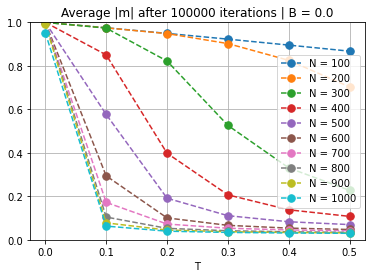

In [4]:
plt.figure()
for i, n in enumerate(N):
    plt.plot(T, m_mean[1, i, :], '.--', markersize=15, label=f"N = {n}")
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.xlabel('T')
plt.title(f"Average |m| after {iterations} iterations | B = {B:.1f}")
plt.show()